In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

# Display the preprocessed dataset
print(titanic_df.head())


   PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

   Sex   Age  SibSp  Parch            Ticket     Fare  Embarked  Survived  
0    1  22.0      1      0         A/5 21171   7.2500         2         0  
1    0  38.0      1      0          PC 17599  71.2833         0         1  
2    0  26.0      0      0  STON/O2. 3101282   7.9250         2         1  
3    0  35.0      1      0            113803  53.1000         2         1  
4    1  35.0      0      0            373450   8.0500         2         0  


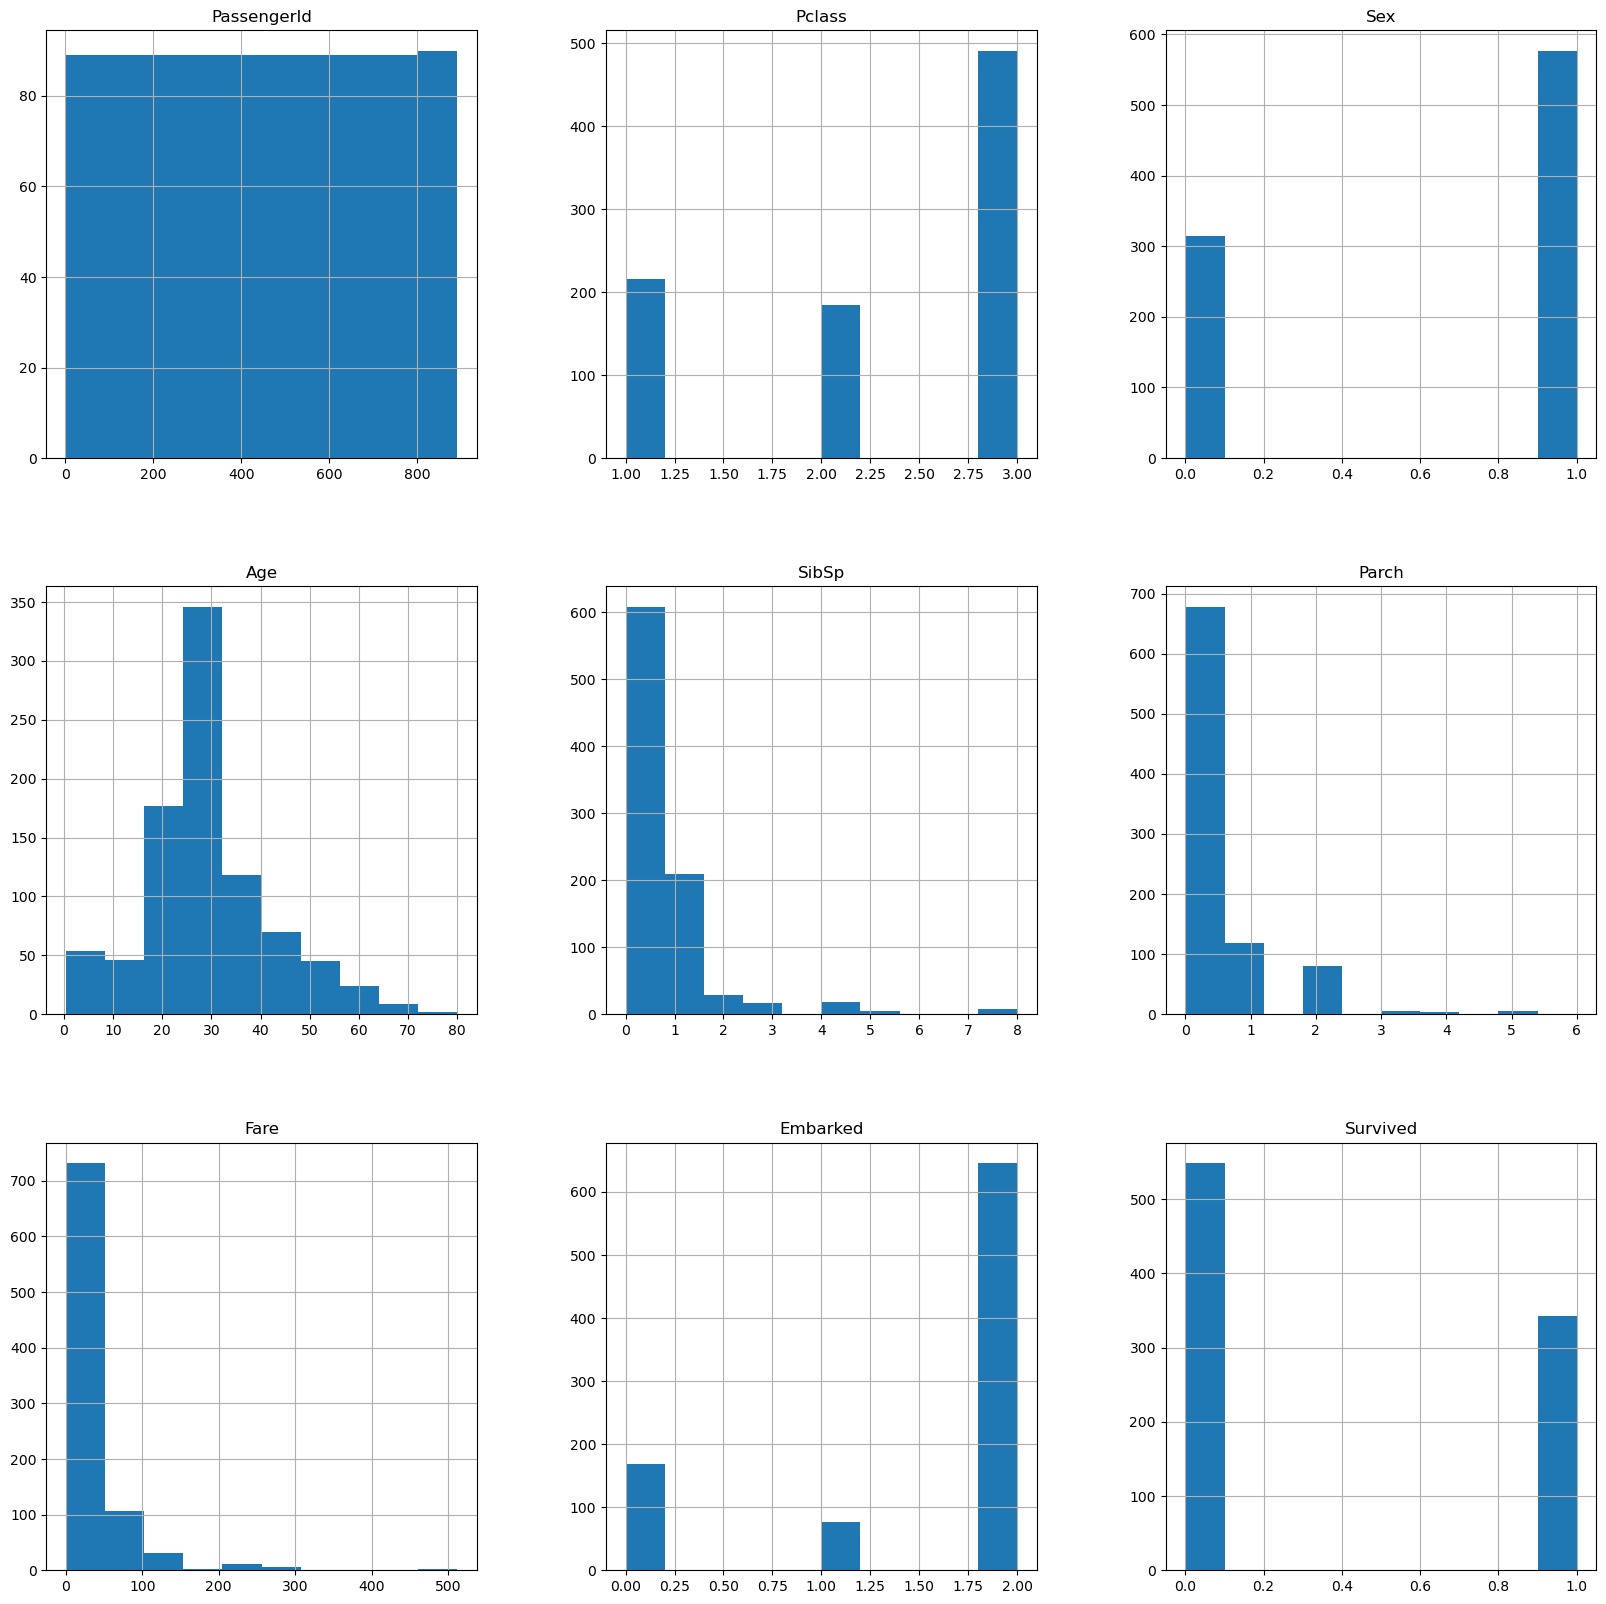

In [2]:
#data Visualization plot
p= titanic_df.hist(figsize=(20,20))

# Splitting the data for training and testing

In [3]:
# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')
# Preprocess the data
# Drop the 'Name' and 'Ticket' columns
titanic_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Fill missing values in 'Age', 'Cabin', 'Embarked' with the median and mode respectively
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Cabin'].fillna(titanic_df['Cabin'].mode()[0], inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Split the dataset into features (X) and target variable (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the dataset into training and testing sets with a 70-30 ratio and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)


Training set: (623, 9) (623,)
Testing set: (268, 9) (268,)


# Defining preprocessing

In [4]:
# Define the preprocessing steps
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Sex', 'Cabin', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# SVM model

In [5]:
# Define the SVM model
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', SVC())])

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model on the testing set
svm_accuracy = svm_model.score(X_test, y_test)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

SVM Accuracy: 0.82


# Confusion Matrix

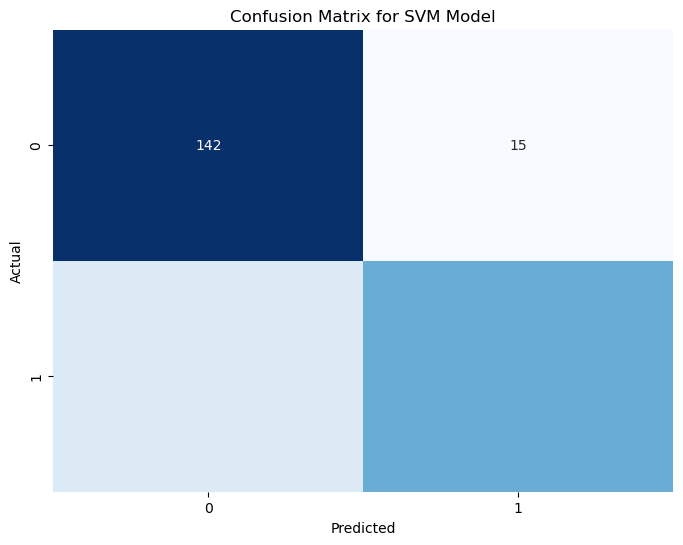

In [6]:
# Calculate confusion matrix for SVM model
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Model

In [7]:
# Generate classification report for SVM model
svm_classification_report = classification_report(y_test, svm_predictions)

# Print classification report
print("Classification Report for SVM Model:")
print(svm_classification_report)

Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.71      0.77       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



# ROC curve

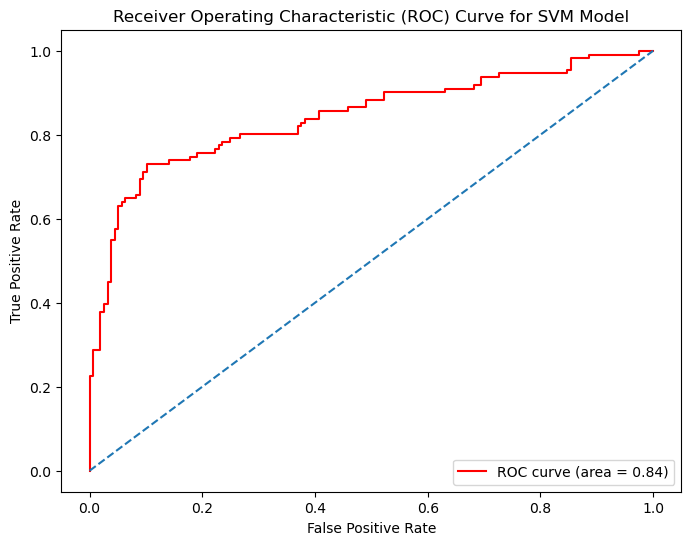

In [8]:
# Calculate the probabilities for the positive class (1)
svm_probs = svm_model.decision_function(X_test)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, svm_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Model')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, svm_probs)
print("ROC AUC Score for SVM Model:", roc_auc)

ROC AUC Score for SVM Model: 0.8423710334538359


# Decision Tree

In [10]:
# Define the Decision Tree model
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])

# Train the Decision Tree model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model on the testing set
dt_accuracy = dt_model.score(X_test, y_test)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')

Decision Tree Accuracy: 0.76


# Confusion Matrix

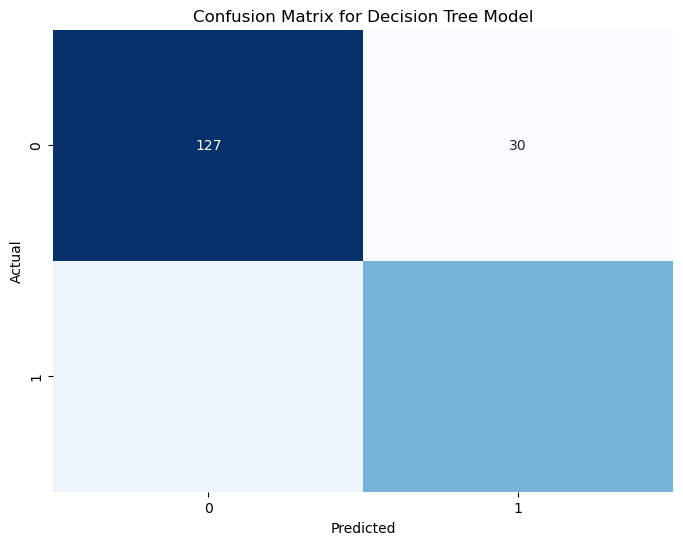

In [11]:
# Calculate confusion matrix for SVM model
conf_matrix_dt = confusion_matrix(y_test, dt_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report

In [12]:
# Generate classification report for Decision Tree model
dt_classification_report = classification_report(y_test, dt_predictions)

# Print classification report
print("Classification Report for Decision Tree Model:")
print(dt_classification_report)

Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       157
           1       0.72      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



# ROC Curve

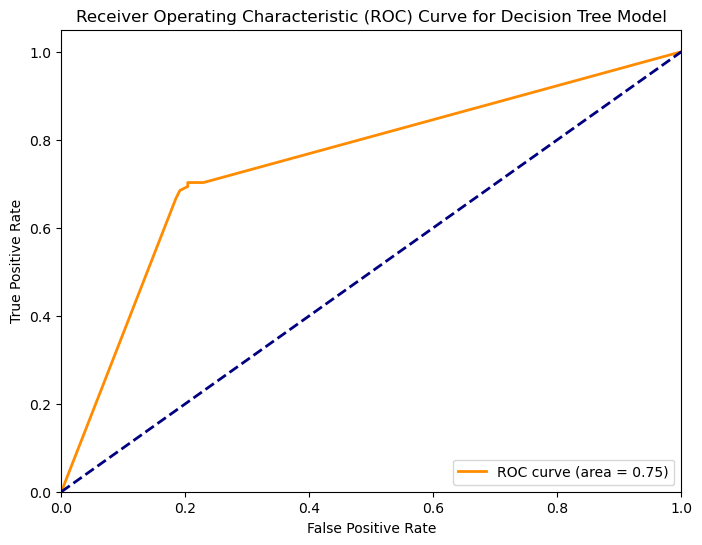

In [13]:
# Calculate the probabilities for the positive class (1)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, dt_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Model')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, dt_probs)
print("ROC AUC Score for Decision Tree Model:", roc_auc)

ROC AUC Score for Decision Tree Model: 0.7486945544270386


In [15]:
print("Accuracy of SVM model:", svm_accuracy)
print("Accuracy of Decision Tree model:", dt_accuracy)

Accuracy of SVM model: 0.8246268656716418
Accuracy of Decision Tree model: 0.7574626865671642


SVM model gives more accuracy than decision tree.

# Select different feature sets and document the chosen features, model configurations, and test accuracies.

In [16]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Define the SVM model with RFE
svm_rfe_model = make_pipeline(preprocessor, RFE(SVC(kernel='linear'), n_features_to_select=5), SVC())

# Define the Decision Tree model with RFE
dt_rfe_model = make_pipeline(preprocessor, RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=5), DecisionTreeClassifier(random_state=42))

# Define the feature sets
feature_sets = [
    ('All Features', X_train),
    ('RFE with SVM', X_train),
    ('RFE with Decision Tree', X_train)
]

# Train and evaluate models for each feature set
for name, features in feature_sets:
    if name == 'All Features':
        model = make_pipeline(preprocessor, SVC())
    elif name == 'RFE with SVM':
        model = svm_rfe_model
    elif name == 'RFE with Decision Tree':
        model = dt_rfe_model

    scores = cross_val_score(model, features, y_train, cv=5)
    print(f'{name}: Mean Accuracy: {scores.mean()}, Std Dev: {scores.std()}')


All Features: Mean Accuracy: 0.8217935483870968, Std Dev: 0.037185977462951415
RFE with SVM: Mean Accuracy: 0.7833548387096775, Std Dev: 0.060775303051306545
RFE with Decision Tree: Mean Accuracy: 0.7672903225806451, Std Dev: 0.012800624334409476


# Task 3: Feature importance Analysis

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Preprocess the data (e.g., handle missing values, encode categorical variables, etc.)
# For simplicity, let's drop missing values and encode categorical variables as dummy variables
df = df.dropna()
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# Define the features (X) and the target variable (y)
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(feature_importance_df.head(10))


      Feature  Importance
1         Age    0.448639
5  Sex_female    0.283937
4        Fare    0.174411
3       Parch    0.048931
2       SibSp    0.022923
9  Embarked_S    0.021159
0      Pclass    0.000000
6    Sex_male    0.000000
7  Embarked_C    0.000000
8  Embarked_Q    0.000000


In [19]:
# Feature Importance using Decision Tree model
feature_importance = dt_model.feature_importances_

# Create a DataFrame to display feature importance
#feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Important Features - Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'